### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Function which plots the loss, classification error and accuracy curves

In [2]:
def plot_train_results(X, Y, w, losses, class_errors, accs):

    iter_range = np.linspace(0, len(losses), 11)
    
    plt.plot(losses, 'b', label = 'loss')
    plt.xlabel('no of iters.')
    plt.ylabel('loss')
    plt.xticks(iter_range)
    plt.show()
    
    plt.plot(class_errors, 'b', label = 'classification error')
    plt.xlabel('no of iters.')
    plt.ylabel('classification error')
    plt.xticks(iter_range)
    plt.show()
    
    plt.plot(accs, 'b', label = 'accuracy')
    plt.xlabel('no of iters.')
    plt.ylabel('accuracy')
    plt.xticks(iter_range)
    plt.show()

### Code for the perceptron learning algorithm

In [3]:
def perceptron(X, Y, num_iters):
    
    X = np.concatenate((X, np.ones((X.shape[0], 1))), axis = 1)
    n = X.shape[0]
    w = np.zeros((X.shape[1], 1))
    
    loss = 0.
    losses = []
    class_error = 0.
    class_errors = []
    acc = 0.
    accs = []
    pred = None
    
    # Training
    for it in range(num_iters):
        loss = 0.
        class_error = 0.
        acc = 0
        for i in range(n):
            y = Y[i]
            x = X[i, :, None]
            
            if np.dot(w.T, x) >= 0:
                pred = 1
            else:
                pred = 0
            
            e = y - pred
            w = w + e * x
            
            loss += abs(e)
            class_error += abs(e)
            acc += (1 - abs(e))
        
        class_error /= n
        acc = (acc / n) * 100.
        
        losses.append(loss)
        class_errors.append(class_error)
        accs.append(acc)
    
    print("Weights: " + str(w))
    
    # Plotting
    plot_train_results(X, Y, w, losses, class_errors, accs)
    return w

### Function which evaluates the weights by outputting the values of the final loss, classification error and accuracy

In [4]:
def evaluate(X, Y, w):
    
    X = np.concatenate((X, np.ones((X.shape[0], 1))), axis = 1)
    
    n = X.shape[0]
    num_tp = 0
    num_tn = 0
    num_fp = 0
    num_fn = 0
    loss = 0.
    class_error = 0.
    acc = 0.
    pred = None
    
    for i in range(n):
        
        x = X[i, :, None]
        y = Y[i]
        
        if np.dot(w.T, x) >= 0:
            pred = 1
        else:
            pred = 0
        e = y - pred
        
        if e == 0:
            if y == 1:
                num_tp += 1
            else:
                num_tn += 1
        elif e == 1:
            num_fn += 1
        elif e == -1:
            num_fp += 1
        
        loss += abs(e)
        class_error += abs(e)
        acc += (1 - abs(e))
    
    class_error /= n
    acc /= n
    
    print("Loss: " + str(loss))
    print("Classification Error: " + str(class_error))
    print("Accuracy: " + str(acc))
    print("Total number of datapoints: " + str(n))
    print("No. True Positives: " + str(num_tp))
    print("No. True Negatives: " + str(num_tn))
    print("No. False Positives: " + str(num_fp))
    print("No. False Negatives: " + str(num_fn))
    
    min_val = X[0][0]
    max_val = X[0][0]
    neg_x1 = []
    neg_x2 = []
    pos_x1 = []
    pos_x2 = []
    for i in range(n):

        min_val = min(min_val, X[i][0])
        max_val = max(max_val, X[i][0])

        if Y[i] == 0:
            neg_x1.append(X[i][0])
            neg_x2.append(X[i][1])
        else:
            pos_x1.append(X[i][0])
            pos_x2.append(X[i][1])
    
    plt.title('Decision boundry')
    plt.plot(pos_x1, pos_x2, 'bo', label = 'positive examples')
    plt.plot(neg_x1, neg_x2, 'ro', label = 'negative examples')
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    x1_vals = np.linspace(min_val, max_val, 20)
    x2_vals = - (w[0] * x1_vals + w[2]) / w[1]
    plt.plot(x1_vals, x2_vals, 'g', label = 'decision boundry')
    plt.show()

## Dataset 1

### Train

Weights: [[  5.71295187]
 [ -0.217958  ]
 [-54.        ]]


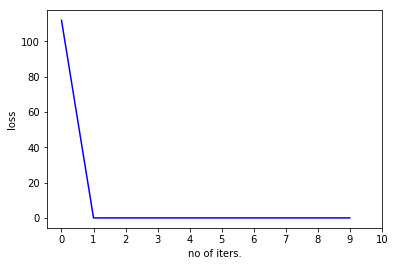

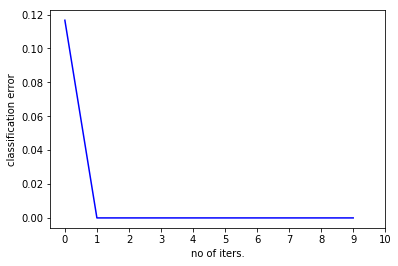

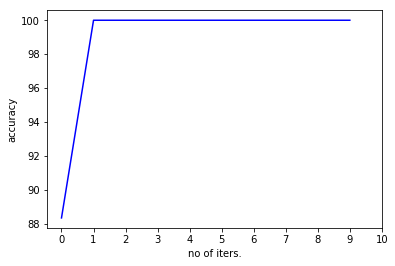

In [5]:
df = pd.read_csv('Datasets-Question1/dataset1/Train1.csv', header=None)
X, Y = df.values[:, :2], df.values[:, 2]
w = perceptron(X, Y, 10)

Loss: 0.0
Classification Error: 0.0
Accuracy: 1.0
Total number of datapoints: 960
No. True Positives: 483
No. True Negatives: 477
No. False Positives: 0
No. False Negatives: 0


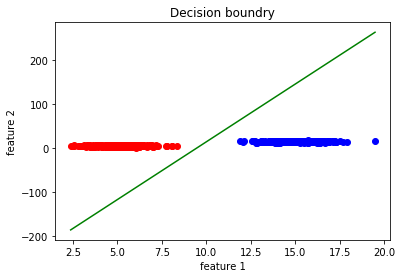

In [6]:
evaluate(X, Y, w)

### Test

Loss: 0.0
Classification Error: 0.0
Accuracy: 1.0
Total number of datapoints: 240
No. True Positives: 117
No. True Negatives: 123
No. False Positives: 0
No. False Negatives: 0


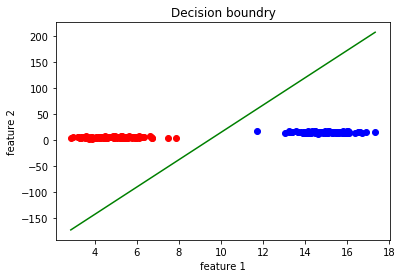

In [7]:
df = pd.read_csv('Datasets-Question1/dataset1/Test1.csv', header=None)
X, Y = df.values[:, :2], df.values[:, 2]
evaluate(X, Y, w)

### Results

- Since the dataset was lineary seperable, perceptron was able to give good results.
- We can see that the although the algorithm was run for 20 iterations, it achieved its optimum weights in the first iteration itself. This suggests that the data was too easy for it to learn.
- The algorithm gave results for the test set which were as good as the train results, hence the algorithm was able to generalize on the data.
- Here we can see that there could have been a better decision boundry (one with a larger margin) that could have fit the data better.

## Dataset 2

### Train

Weights: [[  2.1822026 ]
 [  0.64524301]
 [-33.        ]]


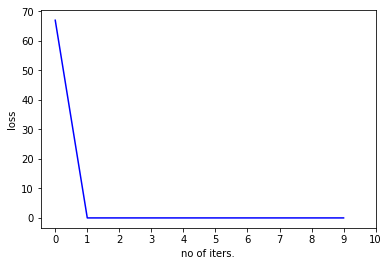

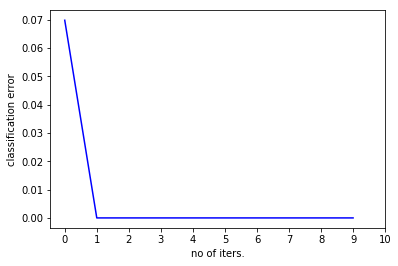

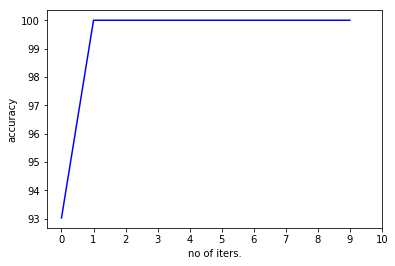

In [8]:
df = pd.read_csv('Datasets-Question1/dataset2/Train2.csv', header=None)
X, Y = df.values[:, :2], df.values[:, 2]
w = perceptron(X, Y, 10)

Loss: 0.0
Classification Error: 0.0
Accuracy: 1.0
Total number of datapoints: 960
No. True Positives: 478
No. True Negatives: 482
No. False Positives: 0
No. False Negatives: 0


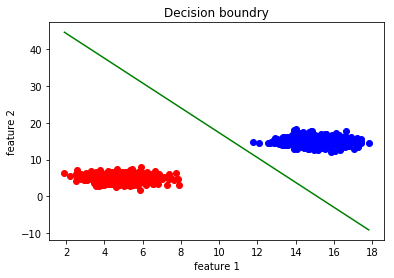

In [9]:
evaluate(X, Y, w)

### Test

Loss: 0.0
Classification Error: 0.0
Accuracy: 1.0
Total number of datapoints: 240
No. True Positives: 122
No. True Negatives: 118
No. False Positives: 0
No. False Negatives: 0


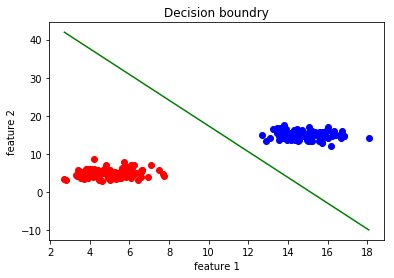

In [10]:
df = pd.read_csv('Datasets-Question1/dataset2/Test2.csv', header=None)
X, Y = df.values[:, :2], df.values[:, 2]
evaluate(X, Y, w)

### Results

- Since the dataset was lineary seperable, perceptron was able to give good results.
- We can see that the although the algorithm was run for 20 iterations, it achieved its optimum weights in the first iteration itself. This suggests that the data was too easy for it to learn.
- The algorithm gave results for the test set which were as good as the train results, hence the algorithm was able to generalize on the data.
- Here we can see that there could have been a better decision boundry (one with a larger margin) that could have fit the data better.

## Dataset 3

### Train

Weights: [[ 183.21311741]
 [-226.39833035]
 [ 508.        ]]


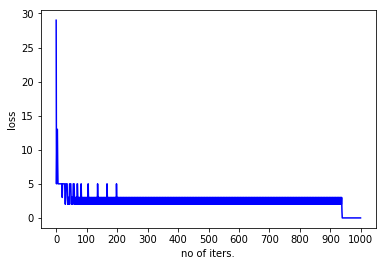

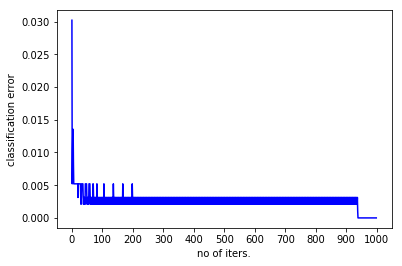

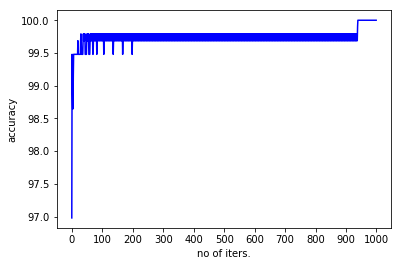

In [11]:
df = pd.read_csv('Datasets-Question1/dataset3/Train3.csv', header=None)
X, Y = df.values[:, :2], df.values[:, 2]
w = perceptron(X, Y, 1000)

Loss: 0.0
Classification Error: 0.0
Accuracy: 1.0
Total number of datapoints: 960
No. True Positives: 483
No. True Negatives: 477
No. False Positives: 0
No. False Negatives: 0


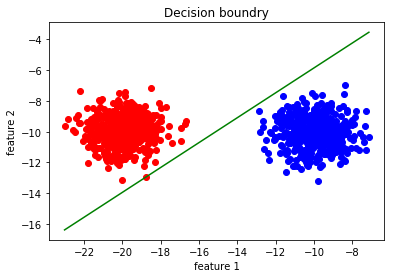

In [12]:
evaluate(X, Y, w)

### Test

Loss: 1.0
Classification Error: 0.004166666666666667
Accuracy: 0.9958333333333333
Total number of datapoints: 240
No. True Positives: 117
No. True Negatives: 122
No. False Positives: 1
No. False Negatives: 0


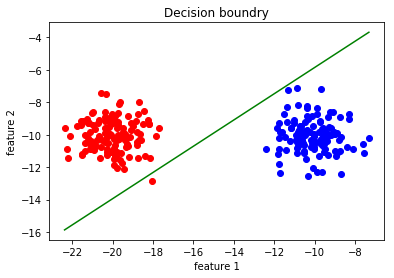

In [13]:
df = pd.read_csv('Datasets-Question1/dataset3/Test3.csv', header=None)
X, Y = df.values[:, :2], df.values[:, 2]
evaluate(X, Y, w)

### Results

- Since the dataset was lineary seperable, perceptron was able to give good results.
- The algorithm took a lot of iterations to learn its optimum weights, this shows that even when linear seperability is present, convergence may not be too fast.
- The algorithm gave good results in the train and test set for this dataset.
- Here we can see that there could have been a better classifier (one with a larger margin) which could have fit the data better.

## Dataset 4

### Train

Weights: [[-1.61359395]
 [-0.36893594]
 [ 0.        ]]


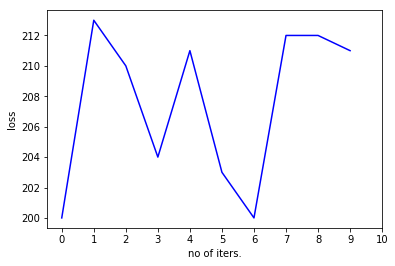

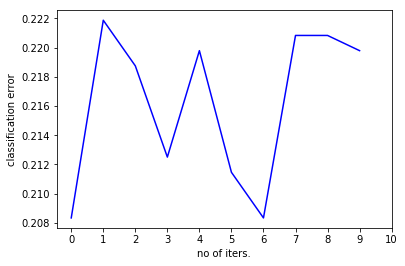

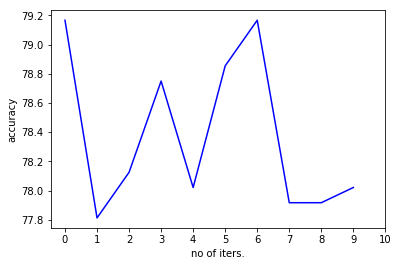

In [14]:
df = pd.read_csv('Datasets-Question1/dataset4/Train4.csv', header=None)
X, Y = df.values[:, :2], df.values[:, 2]
w = perceptron(X, Y, 10)

Loss: 167.0
Classification Error: 0.17395833333333333
Accuracy: 0.8260416666666667
Total number of datapoints: 960
No. True Positives: 371
No. True Negatives: 422
No. False Positives: 63
No. False Negatives: 104


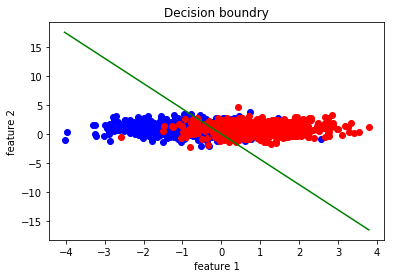

In [15]:
evaluate(X, Y, w)

### Test

Loss: 48.0
Classification Error: 0.2
Accuracy: 0.8
Total number of datapoints: 240
No. True Positives: 89
No. True Negatives: 103
No. False Positives: 12
No. False Negatives: 36


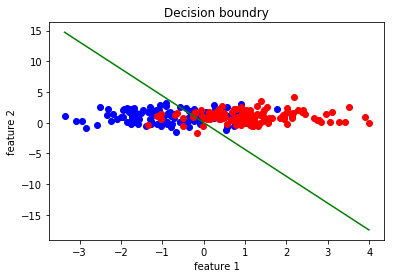

In [16]:
df = pd.read_csv('Datasets-Question1/dataset4/Test4.csv', header=None)
X, Y = df.values[:, :2], df.values[:, 2]
evaluate(X, Y, w)

### Results

- We can clearly see that the dataset was not linearly seperable, hence perceptron was not guaranteed to perform well
- Although linear seperability was not present, the algorithm had still achieved an accuracy which is sufficiently good on such a dataset
- The algorithm was able to generalize on the test set since the train and test accuracies are close.

## Dataset 5

### Train

Weights: [[0.02728033]
 [3.22047376]
 [0.        ]]


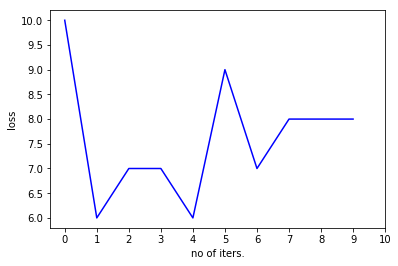

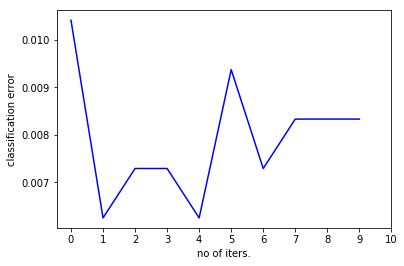

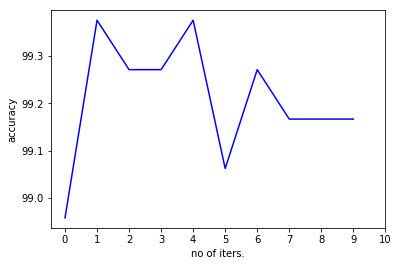

In [17]:
df = pd.read_csv('Datasets-Question1/dataset5/Train5.csv', header=None)
X, Y = df.values[:, :2], df.values[:, 2]
w = perceptron(X, Y, 10)

Loss: 3.0
Classification Error: 0.003125
Accuracy: 0.996875
Total number of datapoints: 960
No. True Positives: 481
No. True Negatives: 476
No. False Positives: 1
No. False Negatives: 2


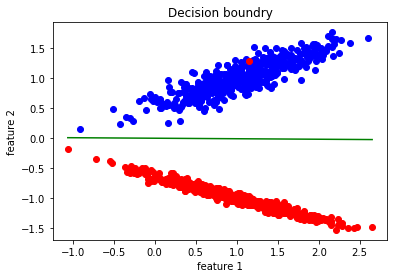

In [18]:
evaluate(X, Y, w)

### Test

Loss: 0.0
Classification Error: 0.0
Accuracy: 1.0
Total number of datapoints: 240
No. True Positives: 118
No. True Negatives: 122
No. False Positives: 0
No. False Negatives: 0


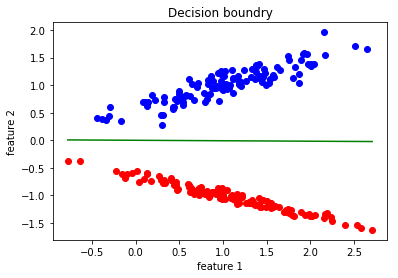

In [19]:
df = pd.read_csv('Datasets-Question1/dataset5/Test5.csv', header=None)
X, Y = df.values[:, :2], df.values[:, 2]
evaluate(X, Y, w)

### Results

- Except for a few outliers, the dataset was almost linearly seperable which led to the algorithm performing well on this dataset.
- It could be possible that if we had run this algorithm for some more iterations, then it would have tried to classify the outliers and reduce the overall accuracy. But since, I have not done that, we may observe that the algorithm has succesfully learnt to ignore the outliers
- The algorithm gave excellent test results.

## Dataset 6

### Train

Weights: [[0.60339632]
 [0.05530442]
 [0.        ]]


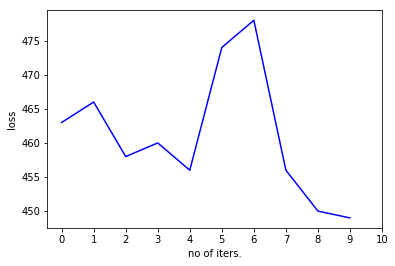

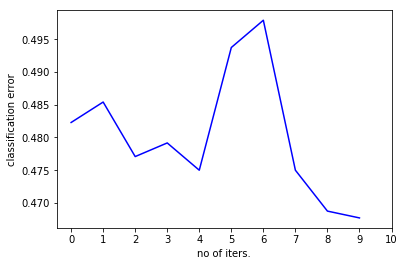

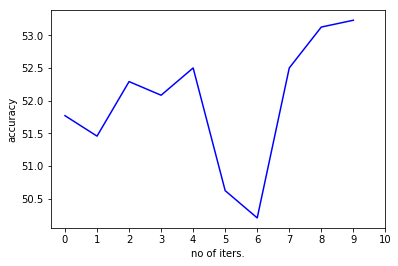

In [20]:
df = pd.read_csv('Datasets-Question1/dataset6/Train6.csv', header=None)
X, Y = df.values[:, :2], df.values[:, 2]
w = perceptron(X, Y, 10)

Loss: 471.0
Classification Error: 0.490625
Accuracy: 0.509375
Total number of datapoints: 960
No. True Positives: 245
No. True Negatives: 244
No. False Positives: 236
No. False Negatives: 235


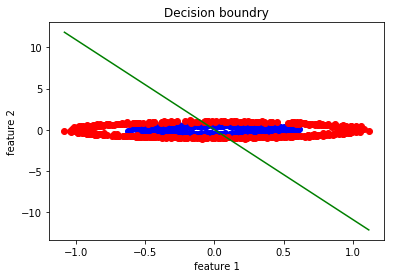

In [21]:
evaluate(X, Y, w)

### Test

Loss: 123.0
Classification Error: 0.5125
Accuracy: 0.4875
Total number of datapoints: 240
No. True Positives: 61
No. True Negatives: 56
No. False Positives: 64
No. False Negatives: 59


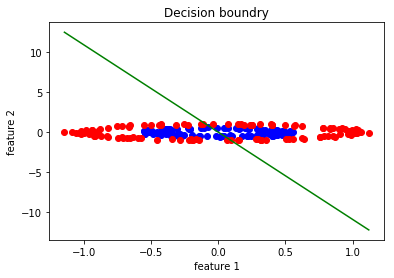

In [22]:
df = pd.read_csv('Datasets-Question1/dataset6/Test6.csv', header=None)
X, Y = df.values[:, :2], df.values[:, 2]
evaluate(X, Y, w)

### Results

- This dataset is not even close to linearly seperable, hence the algorithm was not able to learn enough from the data.
- The algorithm performed badly on both train and test sets of the current dataset.
- The train and test accuracies are almost the same.

## Dataset 7

### Train

Weights: [[ 1.539745  ]
 [-5.08036074]
 [ 1.        ]]


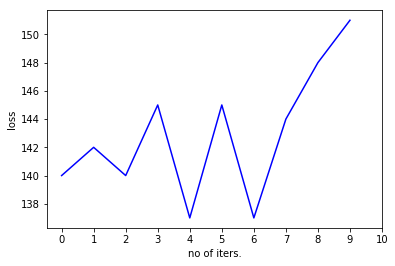

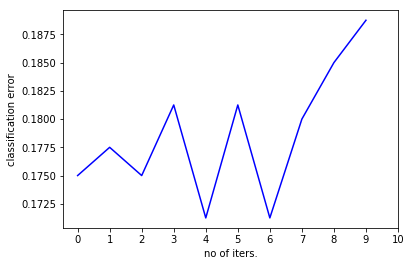

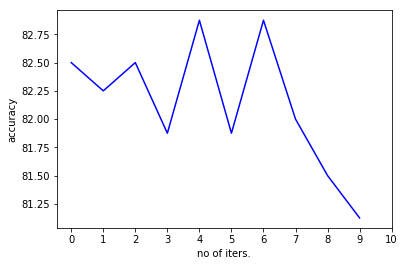

In [23]:
df = pd.read_csv('Datasets-Question1/dataset7/Train7.csv', header=None)
X, Y = df.values[:, :2], df.values[:, 2]
w = perceptron(X, Y, 10)

Loss: 110.0
Classification Error: 0.1375
Accuracy: 0.8625
Total number of datapoints: 800
No. True Positives: 351
No. True Negatives: 339
No. False Positives: 67
No. False Negatives: 43


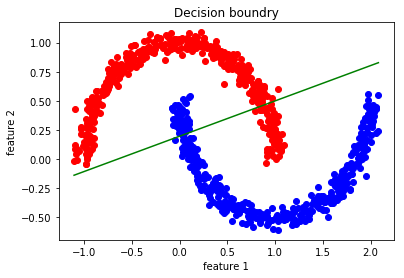

In [24]:
evaluate(X, Y, w)

### Test

Loss: 16.0
Classification Error: 0.08
Accuracy: 0.92
Total number of datapoints: 200
No. True Positives: 100
No. True Negatives: 84
No. False Positives: 10
No. False Negatives: 6


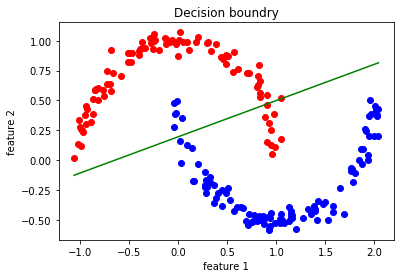

In [25]:
df = pd.read_csv('Datasets-Question1/dataset7/Test7.csv', header=None)
X, Y = df.values[:, :2], df.values[:, 2]
evaluate(X, Y, w)

### Results

- This dataset is not linearly seperable, but since most of the data could be seperated by a line, perceptron was able to give fairly good results on the train as well as the test set.
- Only some part of the data was wrongly classified, which resulted in the accuracy being high.
- The algorithm was able to generalize on the test set.

## Conclusion

- The perceptron learning algorithm is used for classification of data which is linearly seperable.
- The algorithm is able to learn fast (i.e fewer number of iterations) when the data is easy for it to learn.
- The algorithm is able to achieve results on the test set which are similary to those on the training set.
- The algorithm is able to find and ignore outliers in the data when trained for lower number of iterations.
- The perceptron learning algorithm is not guaranteed to decrease the loss at every iteration, since in each iteration, it tries to correctly classify individual points and this is not able to show that we would decrease the loss at every iteration.